In [1]:
import pandas as pd
import matplotlib.pyplot as plt

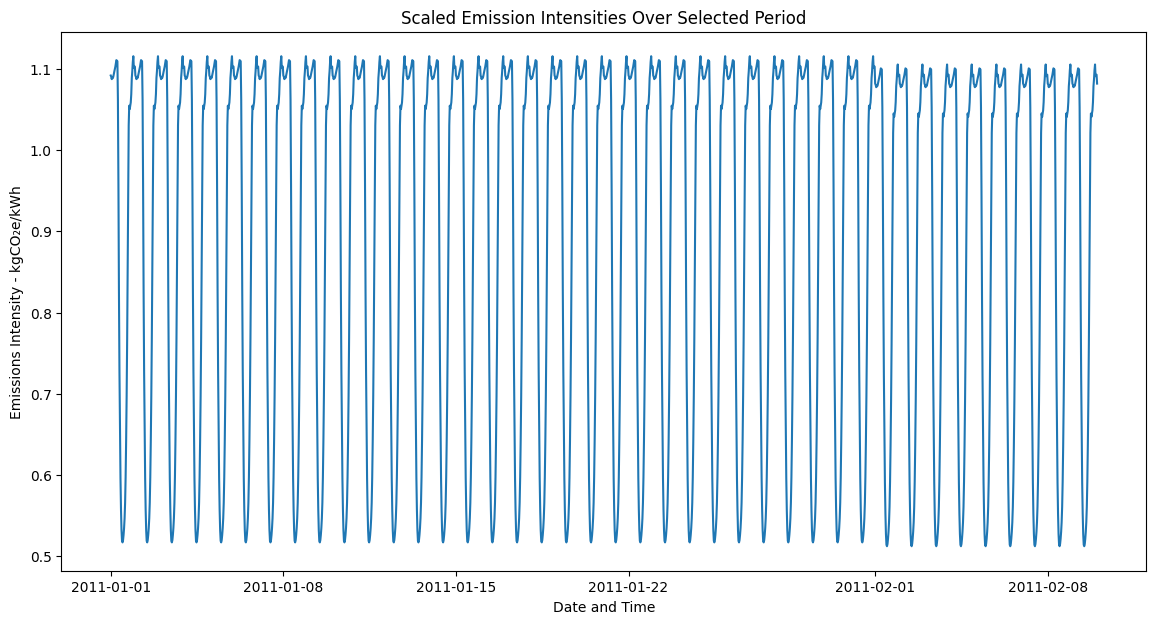

In [2]:
# 1. Load and prepare the yearly data
yearly_data = pd.read_csv('../../0raw_data/19981201_New_South_Wales_yearly.csv', parse_dates=['date'])
yearly_data['date'] = pd.to_datetime(yearly_data['date'])
yearly_data_filtered = yearly_data[(yearly_data['date'] >= '2010-07-01') & (yearly_data['date'] <= '2013-06-30')]
monthly_averages = yearly_data_filtered.groupby(yearly_data_filtered['date'].dt.to_period('M'))['Emissions Intensity - kgCO₂e/MWh'].mean()

# 2. Load and prepare the weekly data
weekly_data = pd.read_csv('../../0raw_data/20240405_New_South_Wales_weekly.csv', parse_dates=['date'])
weekly_data['time'] = weekly_data['date'].dt.time
daily_profile_average = weekly_data.groupby('time')['Emissions Intensity - kgCO₂e/MWh'].mean()

# 3. Normalize the daily profile by setting its average to 1
normalized_daily_profile = daily_profile_average / daily_profile_average.mean()

# 4. Creating a template DataFrame with all half-hour slots for every day in the range
date_range = pd.date_range('2010-07-01 00:00:00', '2013-06-30 23:30:00', freq='30T')
scaled_emissions = pd.DataFrame(index=date_range, columns=['emissions'])

# 5. Scale the normalized profile by the monthly average for each corresponding month
for single_date in scaled_emissions.index:
    month_period = single_date.to_period('M')
    if month_period in monthly_averages.index:
        month_intensity = monthly_averages[month_period]
        scaled_emissions.at[single_date, 'emissions'] = normalized_daily_profile[single_date.time()] * month_intensity

scaled_emissions['emissions'] /= 1000 # MWh to kWh

# 6. Plotting
start_date = pd.Timestamp('2011-01-01')
end_date = pd.Timestamp('2011-02-10')

# Filter the scaled emissions DataFrame to the specified date range
filtered_emissions = scaled_emissions[(scaled_emissions.index >= start_date) & (scaled_emissions.index <= end_date)]

# Plot the filtered result
plt.figure(figsize=(14, 7))
plt.plot(filtered_emissions.index, filtered_emissions['emissions'])
plt.title('Scaled Emission Intensities Over Selected Period')
plt.xlabel('Date and Time')
plt.ylabel('Emissions Intensity - kgCO₂e/kWh')
plt.show()

In [3]:
scaled_emissions

,emissions
2010-07-01 00:00:00,1.0662
2010-07-01 00:30:00,1.064706
2010-07-01 01:00:00,1.061807
2010-07-01 01:30:00,1.064542
2010-07-01 02:00:00,1.062929
...,...
2013-06-30 21:30:00,1.071594
2013-06-30 22:00:00,1.078417
2013-06-30 22:30:00,1.064344
2013-06-30 23:00:00,1.065842


In [5]:
#scaled_emissions.to_csv('../../3final_data/Emission_Intensity_dataset.csv', index=True)